## Informative Search using A* Algorithm and its comparison to uninformed search methods (BFS, Dijkstra)

import the necessary libraries

In [151]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import networkx as nx
%matplotlib inline

'build_maze' builds the maze from 'maze_file.txt'.

In [152]:
def build_maze(maze_file):
    '''
    para1: filename of the maze txt file
    return mazes as a numpy array walls: 0 - no wall, 1 - wall in the maze
    '''
    a = open(maze_file, 'r')  
    m=[]
    for i in a.readlines():
        m.append(np.array(i.split(" "), dtype="int32"))
    return np.array(m)

define START and GOAL states within the maze

***Visualize the maze***: 

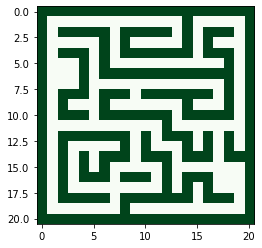

In [153]:
# (you are encouraged to look at the API of 'imshow')
plt.imshow(build_maze("maze_20x20.txt"), cmap='Greens')

In [154]:
START=(1, 1)
GOAL=(19,19)
# Goal for 50X50 maze is (1,49)

'Find_the_edges' builds the graph for the maze, assuming that the robot can move only in the four directions (Up, Down, Right, Left).

In [155]:
def Find_the_edges(maze):
    '''
    para1: numpy array of the maze structure
    return graph of the connected nodes
    '''
    graph={}
    grid_size=len(maze)
    for i in range(grid_size):
        for j in range(grid_size):
            if(maze[i][j]!=1):
                adj=[]
                eles=[]
                if i - 1 >= 0:
                    eles.append((i-1,j))
                if i + 1 < grid_size:
                    eles.append((i+1,j))
                if j - 1 >=0:
                    eles.append((i,j-1))
                if j+1< grid_size:
                    eles.append((i,j+1))
                for ele in eles:
                    if maze[ele[0]][ele[1]] == 0 or maze[ele[0]][ele[1]]=='3' :
                        adj.append((ele[0],ele[1]))
                graph[(i,j)]=adj
    return graph

***Breadth First Search (BFS)***

In [156]:
from collections import deque
def BreadthFirst(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    queue = deque([([start], start)])
    visited = set()
    
    while queue:
        path, current = queue.popleft()
        #print(path, current)
        if current == goal:
            #print( path)
            return visited, np.array(path)
        if current in visited:
            continue
        #print(current)
        visited.add(current)
        for neighbour in graph[current]:
            #print(graph[current])
            p = list(path)
            p.append(neighbour)
            queue.append((p, neighbour))
    return visited, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [157]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_20x20.txt")
graph=Find_the_edges(maze1)
visited, path = BreadthFirst(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

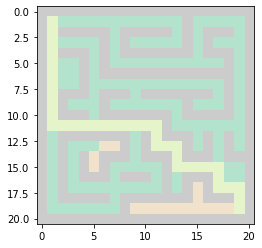

In [158]:
plt.imshow(maze1, cmap='Pastel2')

- ***gray cells*** means the walls of the maze
- ***dark green cells*** means the visited cells of the maze
- ***light green cells*** means the shortest path of the maze
- ***light brown*** means the unvisited cells of the maze

***A**** ***-search*** 

In [159]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + 1
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + W*Euclidean_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

***Dijkstra Algorithm***

In [160]:
def dijkstra_algorithm(graph, start_node, GOAL):
    '''
    para1: connected graph 
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    unvisited_nodes = list(graph.keys())
 
    # We'll use this dict to save the cost of visiting each node and update it as we move along the graph   
    shortest_path = {}
 
    # We'll use this dict to save the shortest known path to a node found so far
    previous_nodes = {}
 
    # We'll use max_value to initialize the "infinity" value of the unvisited nodes   
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value
    # However, we initialize the starting node's value with 0   
    shortest_path[start_node] = 0
    
    # The algorithm executes until we visit all nodes
    while GOAL in unvisited_nodes:
        # The code block below finds the node with the lowest score
        current_min_node = None
        for node in unvisited_nodes: # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
                
        # The code block below retrieves the current node's neighbors and updates their distances
        neighbors = graph[current_min_node]
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + 1 
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node
 
        # After visiting its neighbors, we mark the node as "visited"
        unvisited_nodes.remove(current_min_node)

    current= GOAL
    path = []
    while current != START: 
        path.append(current)
        #print(previous_nodes[current])
        current = previous_nodes[current]
    path.append(START) 
    path.reverse() 
    return previous_nodes, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    


'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

### Task - 1

Build your maze with dimentions 25 x 25 and a similar complexity (number of obstacles/fences) 
as in the maze provided in 'maze_20x20.txt'. Check that there exists a path between START at the 
(1, 1) and the GOAL at (25, 25) in your maze. Store your maze to 'my_maze_25x25.txt'. Visualize your maze. 
Use your maze in the below tasks. 

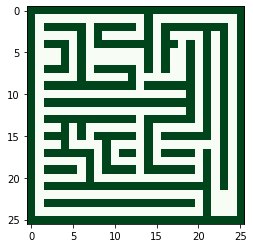

In [161]:
plt.imshow(build_maze("maze_25x25.txt"), cmap='Greens')

Maze 25x25

In [162]:
START=(1, 1)
GOAL=(24,24)

In [163]:
def Find_the_edges(maze):
    '''
    para1: numpy array of the maze structure
    return graph of the connected nodes
    '''
    graph={}
    grid_size=len(maze)
    for i in range(grid_size):
        for j in range(grid_size):
            if(maze[i][j]!=1):
                adj=[]
                eles=[]
                if i - 1 >= 0:
                    eles.append((i-1,j))
                if i + 1 < grid_size:
                    eles.append((i+1,j))
                if j - 1 >=0:
                    eles.append((i,j-1))
                if j+1< grid_size:
                    eles.append((i,j+1))
                for ele in eles:
                    if maze[ele[0]][ele[1]] == 0 or maze[ele[0]][ele[1]]=='3' :
                        adj.append((ele[0],ele[1]))
                graph[(i,j)]=adj
    return graph

### Task - 2

A* algorithm requires a heuristic function. You will try two following heuristics:
- Euclidean distance between the cell coordinates
- Manhattan distance between the cell coordinates 

# Euclidean distance

In [164]:
def Euclidean_distance(node1, node2):
    '''
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Euclidean distance between the 2 nodes
    '''
    return ((node1[0] - node2[0])**2 + (node1[1] - node2[1])**2)**0.5
    pass



# A* Search

### Weight = 1

In [165]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    W=1
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + 1
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + W*Euclidean_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [166]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

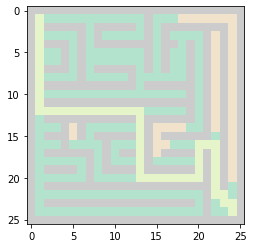

In [167]:
plt.imshow(maze1, cmap='Pastel2')

In [168]:
shortest_path_length = len(path)
print(f"Distance of the shortest path: {shortest_path_length}")

Distance of the shortest path: 55


# Manhattan distance

In [169]:
# implement the Manhattan distance between the 2 nodes, and update the code for A* accordingly
def Manhattan_distance(node1, node2):
    '''
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Manhattan distance between the 2 nodes
    '''
    x1, y1 = node1
    x2, y2 = node2
    return abs(x1 - x2) + abs(y1 - y2)
#     refer to https://xlinux.nist.gov/dads/HTML/manhattanDistance.html
    pass

# A* Search 

### Weight = 1

In [170]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    W=1
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + 1
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + W*Manhattan_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [171]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

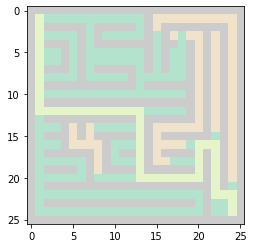

In [172]:
plt.imshow(maze1, cmap='Pastel2')

In [173]:
shortest_path_length = len(path)
print(f"Distance of the shortest path: {shortest_path_length}")
print(len(visited))

Distance of the shortest path: 55
248


### Task - 3


In this task we will solve the maze with 4 different weights, W, in A* for each of the heurstic function mentioned above. Visualize the solution for each W and each heurstic on a separate plot in the same format as in the examle above (see cell 17). ***Chose a broad set of values for W to see the difference.***

# Euclidean distance

In [174]:
Weights_Euclidean=[]
TimeTaken_Euclidean=[]
SearchSpaces_Euclidean=[]

### Weight = 0.1

In [175]:
import heapq
import time

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    start_time = time.perf_counter()
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    W=0.1
    # Initialize a set for visited nodes
    visited_nodes = set()
    
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        visited_nodes.add(current)
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + 1
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + W*Euclidean_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    expanded_nodes = len(visited_nodes)
    end_time = time.perf_counter()
    elapsed_time = end_time - start_time
    Weights_Euclidean.append(0.1)
    SearchSpaces_Euclidean.append(expanded_nodes)
    TimeTaken_Euclidean.append(elapsed_time)
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [176]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

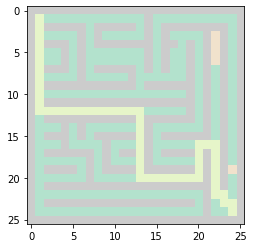

In [177]:
plt.imshow(maze1, cmap='Pastel2')

In [178]:
shortest_path_length = len(path)
print(f"Distance of the shortest path: {shortest_path_length}")

Distance of the shortest path: 55


### Weight = 0.5

In [179]:
import heapq
import time

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    start_time = time.perf_counter()
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    W=0.5
    # Initialize a set for visited nodes
    visited_nodes = set()
    
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        visited_nodes.add(current)
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + 1
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + W*Euclidean_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    expanded_nodes = len(visited_nodes)
    end_time = time.perf_counter()
    elapsed_time = end_time - start_time
    Weights_Euclidean.append(0.5)
    SearchSpaces_Euclidean.append(expanded_nodes)
    TimeTaken_Euclidean.append(elapsed_time)
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [180]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

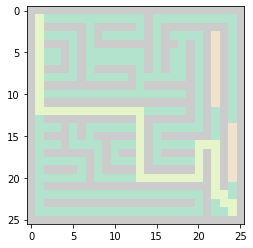

In [181]:
plt.imshow(maze1, cmap='Pastel2')

In [182]:
shortest_path_length = len(path)
print(f"Distance of the shortest path: {shortest_path_length}")

Distance of the shortest path: 55


### Weight = 2

In [183]:
import heapq
import time

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    start_time = time.perf_counter()
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    W=2
    # Initialize a set for visited nodes
    visited_nodes = set()
    
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        visited_nodes.add(current)
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + 1
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + W*Euclidean_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    expanded_nodes = len(visited_nodes)
    end_time = time.perf_counter()
    elapsed_time = end_time - start_time
    Weights_Euclidean.append(2)
    SearchSpaces_Euclidean.append(expanded_nodes)
    TimeTaken_Euclidean.append(elapsed_time)
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [184]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

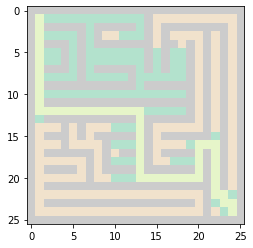

In [185]:
plt.imshow(maze1, cmap='Pastel2')

In [186]:
shortest_path_length = len(path)
print(f"Distance of the shortest path: {shortest_path_length}")

Distance of the shortest path: 55


### Weight = 4

In [187]:
import heapq
import time

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    start_time = time.perf_counter()
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    W=4
    # Initialize a set for visited nodes
    visited_nodes = set()
    
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        visited_nodes.add(current)
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + 1
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + W*Euclidean_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    expanded_nodes = len(visited_nodes)
    end_time = time.perf_counter()
    elapsed_time = end_time - start_time
    Weights_Euclidean.append(4)
    SearchSpaces_Euclidean.append(expanded_nodes)
    TimeTaken_Euclidean.append(elapsed_time)
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [188]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

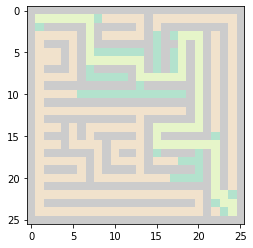

In [189]:
plt.imshow(maze1, cmap='Pastel2')

In [190]:
shortest_path_length = len(path)
print(f"Distance of the shortest path: {shortest_path_length}")

Distance of the shortest path: 67


In [191]:
print(Weights_Euclidean)
print(SearchSpaces_Euclidean)
print(TimeTaken_Euclidean)

[0.1, 0.5, 2, 4]
[319, 307, 154, 105]
[0.0010449000000107844, 0.0010540000000105465, 0.0005552000000079715, 0.00041749999996909537]


Explain what changes you observe for the different weights and why it occurs.

**Here we have chosen weights as 0.1, 0.5, 2, 4 we make the following observations.**


    1) Multiplying Heuristic with w < 1 (e.g., w = 0.5):
       => When we multiply the heuristic with a weight less than 1, we reduce the heuristic's influence on the A* algorithm. 
       =>  The algorithm becomes more optimistic and may consider paths that appear shorter based on the adjusted heuristic, This optimism can lead to exploring a larger search space as the algorithm may chase paths that seem promising but are not actually optimal.
       => The algorithm may take longer to converge and may explore more paths before finding the optimal solution.
              
     2) Multiplying Heuristic with w > 1 (e.g., w = 2):
       => When you multiply the heuristic with a weight < 1, you amplify the heuristic's influence on the algorithm. 
       => As a result, the algorithm becomes more pessimistic and may consider paths that appear longer based on the adjusted heuristic, even if they are not necessarily longer in reality. This pessimism can lead to exploring a smaller search space as the algorithm may discard paths that seem longer but are actually optimal.
       => The algorithm may converge faster and explore fewer paths before finding the optimal solution.

# Manhattan distance

In [192]:
Weights_Manhattan=[]
TimeTaken_Manhattan=[]
SearchSpaces_Manhattan=[]

### Weight = 0.1

In [193]:
import heapq
import time

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    start_time = time.perf_counter()
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    W=0.1
    # Initialize a set for visited nodes
    visited_nodes = set()
    
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        visited_nodes.add(current)
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + 1
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + W*Manhattan_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    expanded_nodes = len(visited_nodes)
    end_time = time.perf_counter()
    elapsed_time = end_time - start_time
    Weights_Manhattan.append(0.1)
    SearchSpaces_Manhattan.append(expanded_nodes)
    TimeTaken_Manhattan.append(elapsed_time)
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [194]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

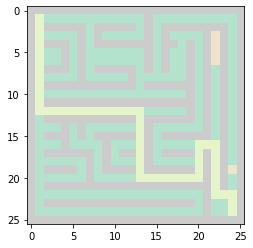

In [195]:
plt.imshow(maze1, cmap='Pastel2')

In [196]:
shortest_path_length = len(path)
print(f"Distance of the shortest path: {shortest_path_length}")

Distance of the shortest path: 55


### Weight = 0.5

In [197]:
import heapq
import time

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    start_time = time.perf_counter()
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    W=0.5
    # Initialize a set for visited nodes
    visited_nodes = set()
    
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        visited_nodes.add(current)
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + 1
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + W*Manhattan_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    expanded_nodes = len(visited_nodes)
    end_time = time.perf_counter()
    elapsed_time = end_time - start_time
    Weights_Manhattan.append(0.5)
    SearchSpaces_Manhattan.append(expanded_nodes)
    TimeTaken_Manhattan.append(elapsed_time)
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [198]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

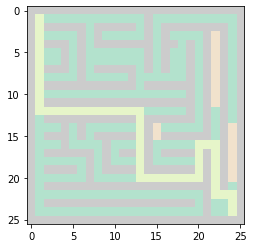

In [199]:
plt.imshow(maze1, cmap='Pastel2')

In [200]:
shortest_path_length = len(path)
print(f"Distance of the shortest path: {shortest_path_length}")

Distance of the shortest path: 55


### Weight = 2

In [201]:
import heapq
import time

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    start_time = time.perf_counter()
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    W=2
    # Initialize a set for visited nodes
    visited_nodes = set()
    
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        visited_nodes.add(current)
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + 1
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + W*Manhattan_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    expanded_nodes = len(visited_nodes)
    end_time = time.perf_counter()
    elapsed_time = end_time - start_time
    Weights_Manhattan.append(2)
    SearchSpaces_Manhattan.append(expanded_nodes)
    TimeTaken_Manhattan.append(elapsed_time)
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [202]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

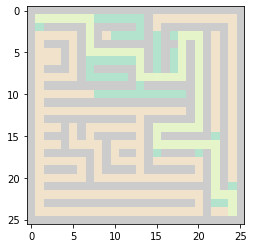

In [203]:
plt.imshow(maze1, cmap='Pastel2')

In [204]:
shortest_path_length = len(path)
print(f"Distance of the shortest path: {shortest_path_length}")

Distance of the shortest path: 67


### Weight = 4

In [205]:
import heapq
import time

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    start_time = time.perf_counter()
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    W=4
    # Initialize a set for visited nodes
    visited_nodes = set()
    
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        visited_nodes.add(current)
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + 1
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + W*Manhattan_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    expanded_nodes = len(visited_nodes)
    end_time = time.perf_counter()
    elapsed_time = end_time - start_time
    Weights_Manhattan.append(4)
    SearchSpaces_Manhattan.append(expanded_nodes)
    TimeTaken_Manhattan.append(elapsed_time)
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [206]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

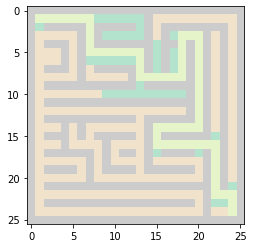

In [207]:
plt.imshow(maze1, cmap='Pastel2')

In [208]:
shortest_path_length = len(path)
print(f"Distance of the shortest path: {shortest_path_length}")

Distance of the shortest path: 67


In [209]:
print(Weights_Manhattan)
print(SearchSpaces_Manhattan)
print(TimeTaken_Manhattan)

[0.1, 0.5, 2, 4]
[319, 304, 106, 95]
[0.0008626000000049316, 0.0008209999999735373, 0.00031370000004926624, 0.0005629000000340056]


Explain what changes you observe for the different weights and why it occurs.

**Here we have chosen weights as 0.1, 0.5, 2, 4 we make the following observations.**


    1) Multiplying Heuristic with w < 1 (e.g., w = 0.5):
       => When we multiply the heuristic with a weight less than 1, we reduce the heuristic's influence on the A* algorithm. 
       =>  The algorithm becomes more optimistic and may consider paths that appear shorter based on the adjusted heuristic, This optimism can lead to exploring a larger search space as the algorithm may chase paths that seem promising but are not actually optimal.
       => The algorithm may take longer to converge and may explore more paths before finding the optimal solution.
              
     2) Multiplying Heuristic with w > 1 (e.g., w = 2):
       => When you multiply the heuristic with a weight < 1, you amplify the heuristic's influence on the algorithm. 
       => As a result, the algorithm becomes more pessimistic and may consider paths that appear longer based on the adjusted heuristic, even if they are not necessarily longer in reality. This pessimism can lead to exploring a smaller search space as the algorithm may discard paths that seem longer but are actually optimal.
       => The algorithm may converge faster and explore fewer paths before finding the optimal solution.

### Task - 4

# Heuristic: Euclidean Distance

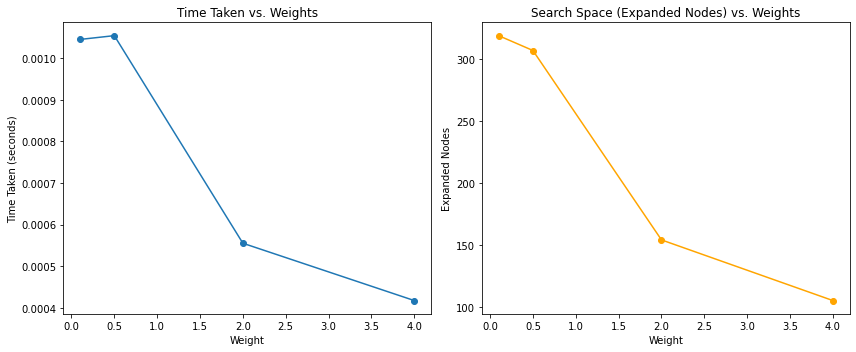

In [210]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.plot(Weights_Euclidean, TimeTaken_Euclidean, marker='o')
plt.title('Time Taken vs. Weights')
plt.xlabel('Weight')
plt.ylabel('Time Taken (seconds)')

plt.subplot(122)
plt.plot(Weights_Euclidean, SearchSpaces_Euclidean, marker='o', color='orange')
plt.title('Search Space (Expanded Nodes) vs. Weights')
plt.xlabel('Weight')
plt.ylabel('Expanded Nodes')


plt.tight_layout()

plt.show()


Plot on plt.subplot(121) a) time taken VS Weights

Plot on plt.subplot(122) b) search space (expanded nodes) VS Weights

-- add titles, axis labels, and legends.

# Heuristic: Manhattan Distance

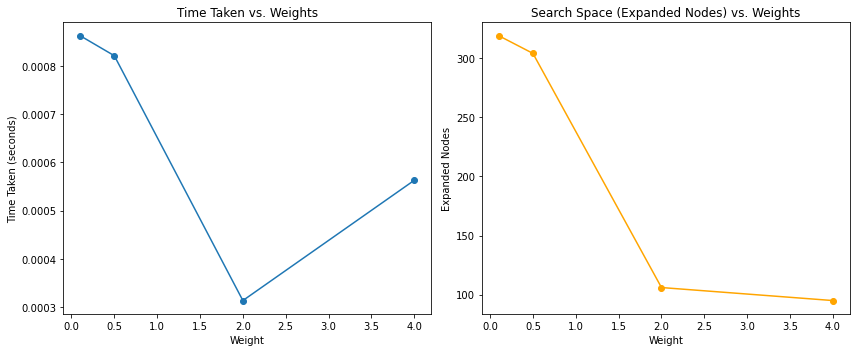

In [211]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.plot(Weights_Manhattan, TimeTaken_Manhattan, marker='o')
plt.title('Time Taken vs. Weights')
plt.xlabel('Weight')
plt.ylabel('Time Taken (seconds)')

plt.subplot(122)
plt.plot(Weights_Manhattan, SearchSpaces_Manhattan, marker='o', color='orange')
plt.title('Search Space (Expanded Nodes) vs. Weights')
plt.xlabel('Weight')
plt.ylabel('Expanded Nodes')


plt.tight_layout()

plt.show()

### Task - 5

Solve the maze with the Dijkstra algorithm, and visualize the solution in the maze. What is the length of the shortest path?

In [212]:

def dijkstra_algorithm(graph, start_node, GOAL):
    '''
    para1: connected graph 
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    unvisited_nodes = list(graph.keys())
 
    # We'll use this dict to save the cost of visiting each node and update it as we move along the graph   
    shortest_path = {}
 
    # We'll use this dict to save the shortest known path to a node found so far
    previous_nodes = {}
 
    # We'll use max_value to initialize the "infinity" value of the unvisited nodes   
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value
    # However, we initialize the starting node's value with 0   
    shortest_path[start_node] = 0
    
    # The algorithm executes until we visit all nodes
    while GOAL in unvisited_nodes:
        # The code block below finds the node with the lowest score
        current_min_node = None
        for node in unvisited_nodes: # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
                
        # The code block below retrieves the current node's neighbors and updates their distances
        neighbors = graph[current_min_node]
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + 1 
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node
 
        # After visiting its neighbors, we mark the node as "visited"
        unvisited_nodes.remove(current_min_node)

    current= GOAL
    path = []
    while current != START: 
        path.append(current)
        #print(previous_nodes[current])
        current = previous_nodes[current]
    path.append(START) 
    path.reverse() 
    return previous_nodes, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    


'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [213]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = dijkstra_algorithm(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

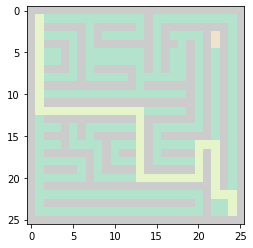

In [214]:
plt.imshow(maze1, cmap='Pastel2')

In [215]:
shortest_path_length = len(path)
print(f"Distance of the shortest path: {shortest_path_length}")

Distance of the shortest path: 55


### Task - 6

Solve the maze with the BFS algorithm, and visualize the solution in the maze. What is the length of the shortest path?

In [216]:
from collections import deque
def BreadthFirst(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    queue = deque([([start], start)])
    visited = set()
    
    while queue:
        path, current = queue.popleft()
        #print(path, current)
        if current == goal:
            #print( path)
            return visited, np.array(path)
        if current in visited:
            continue
        #print(current)
        visited.add(current)
        for neighbour in graph[current]:
            #print(graph[current])
            p = list(path)
            p.append(neighbour)
            queue.append((p, neighbour))
    return visited, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [217]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = BreadthFirst(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

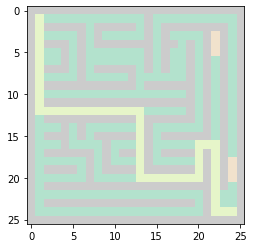

In [218]:
plt.imshow(maze1, cmap='Pastel2')

In [219]:
shortest_path_length = len(path)
print(f"Distance of the shortest path: {shortest_path_length}")

Distance of the shortest path: 55


### Task - 7

Choose 3 random START and GOAL states, and repeat the tasks 2 - 6, and visualize the solution for each. Use W=1 in this task. Explain your observations.

### START = (10,15), GOAL = (24,24)

In [220]:
START=(10,15)
GOAL=(24,24)

In [221]:
def Find_the_edges(maze):
    '''
    para1: numpy array of the maze structure
    return graph of the connected nodes
    '''
    graph={}
    grid_size=len(maze)
    for i in range(grid_size):
        for j in range(grid_size):
            if(maze[i][j]!=1):
                adj=[]
                eles=[]
                if i - 1 >= 0:
                    eles.append((i-1,j))
                if i + 1 < grid_size:
                    eles.append((i+1,j))
                if j - 1 >=0:
                    eles.append((i,j-1))
                if j+1< grid_size:
                    eles.append((i,j+1))
                for ele in eles:
                    if maze[ele[0]][ele[1]] == 0 or maze[ele[0]][ele[1]]=='3' :
                        adj.append((ele[0],ele[1]))
                graph[(i,j)]=adj
    return graph

# Breadth First Search (BFS)

In [222]:
from collections import deque
def BreadthFirst(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    queue = deque([([start], start)])
    visited = set()
    
    while queue:
        path, current = queue.popleft()
        #print(path, current)
        if current == goal:
            #print( path)
            return visited, np.array(path)
        if current in visited:
            continue
        #print(current)
        visited.add(current)
        for neighbour in graph[current]:
            #print(graph[current])
            p = list(path)
            p.append(neighbour)
            queue.append((p, neighbour))
    return visited, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [223]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = BreadthFirst(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

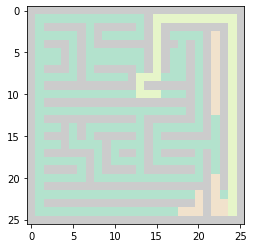

In [224]:
plt.imshow(maze1, cmap='Pastel2')

In [225]:
shortest_path_length = len(path)
print(f"Distance of the shortest path: {shortest_path_length}")

Distance of the shortest path: 46


# Dijkstra Algorithm

In [226]:

def dijkstra_algorithm(graph, start_node, GOAL):
    '''
    para1: connected graph 
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    unvisited_nodes = list(graph.keys())
 
    # We'll use this dict to save the cost of visiting each node and update it as we move along the graph   
    shortest_path = {}
 
    # We'll use this dict to save the shortest known path to a node found so far
    previous_nodes = {}
 
    # We'll use max_value to initialize the "infinity" value of the unvisited nodes   
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value
    # However, we initialize the starting node's value with 0   
    shortest_path[start_node] = 0
    
    # The algorithm executes until we visit all nodes
    while GOAL in unvisited_nodes:
        # The code block below finds the node with the lowest score
        current_min_node = None
        for node in unvisited_nodes: # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
                
        # The code block below retrieves the current node's neighbors and updates their distances
        neighbors = graph[current_min_node]
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + 1 
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node
 
        # After visiting its neighbors, we mark the node as "visited"
        unvisited_nodes.remove(current_min_node)

    current= GOAL
    path = []
    while current != START: 
        path.append(current)
        #print(previous_nodes[current])
        current = previous_nodes[current]
    path.append(START) 
    path.reverse() 
    return previous_nodes, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    


'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [227]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = dijkstra_algorithm(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

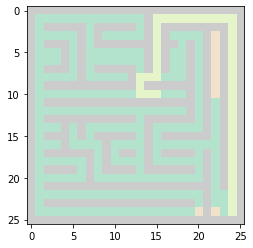

In [228]:
plt.imshow(maze1, cmap='Pastel2')

In [229]:
shortest_path_length = len(path)
print(f"Distance of the shortest path: {shortest_path_length}")

Distance of the shortest path: 46


# Euclidean distance

In [230]:
def Euclidean_distance(node1, node2):
    '''
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Euclidean distance between the 2 nodes
    '''
    return ((node1[0] - node2[0])**2 + (node1[1] - node2[1])**2)**0.5
    pass



# A* Search
Weight = 1

In [231]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    W=1
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + 1
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + W*Euclidean_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [232]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

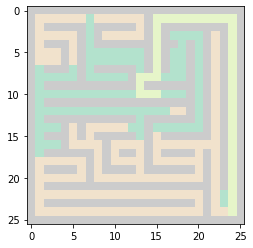

In [233]:
plt.imshow(maze1, cmap='Pastel2')

In [234]:
shortest_path_length = len(path)
print(f"Distance of the shortest path: {shortest_path_length}")

Distance of the shortest path: 46


# Manhattan distance

In [235]:
# implement the Manhattan distance between the 2 nodes, and update the code for A* accordingly
def Manhattan_distance(node1, node2):
    '''
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Manhattan distance between the 2 nodes
    '''
    x1, y1 = node1
    x2, y2 = node2
    return abs(x1 - x2) + abs(y1 - y2)
#     refer to https://xlinux.nist.gov/dads/HTML/manhattanDistance.html
    pass

# A* Search 

### Weight = 1

In [236]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    W=1
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + 1
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + W*Manhattan_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [237]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

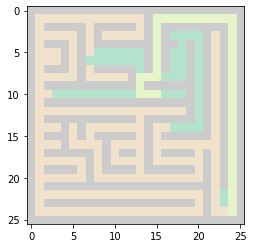

In [238]:
plt.imshow(maze1, cmap='Pastel2')

In [239]:
shortest_path_length = len(path)
print(f"Distance of the shortest path: {shortest_path_length}")

Distance of the shortest path: 46


### START = (3,2), GOAL = (15,24)

In [240]:
START=(3,2)
GOAL=(15,24)

In [241]:
def Find_the_edges(maze):
    '''
    para1: numpy array of the maze structure
    return graph of the connected nodes
    '''
    graph={}
    grid_size=len(maze)
    for i in range(grid_size):
        for j in range(grid_size):
            if(maze[i][j]!=1):
                adj=[]
                eles=[]
                if i - 1 >= 0:
                    eles.append((i-1,j))
                if i + 1 < grid_size:
                    eles.append((i+1,j))
                if j - 1 >=0:
                    eles.append((i,j-1))
                if j+1< grid_size:
                    eles.append((i,j+1))
                for ele in eles:
                    if maze[ele[0]][ele[1]] == 0 or maze[ele[0]][ele[1]]=='3' :
                        adj.append((ele[0],ele[1]))
                graph[(i,j)]=adj
    return graph

# Breadth First Search (BFS)

In [242]:
from collections import deque
def BreadthFirst(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    queue = deque([([start], start)])
    visited = set()
    
    while queue:
        path, current = queue.popleft()
        #print(path, current)
        if current == goal:
            #print( path)
            return visited, np.array(path)
        if current in visited:
            continue
        #print(current)
        visited.add(current)
        for neighbour in graph[current]:
            #print(graph[current])
            p = list(path)
            p.append(neighbour)
            queue.append((p, neighbour))
    return visited, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [243]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = BreadthFirst(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

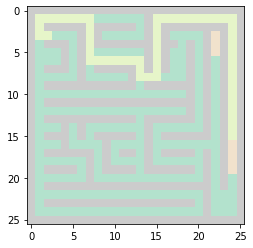

In [244]:
plt.imshow(maze1, cmap='Pastel2')

In [245]:
shortest_path_length = len(path)
print(f"Distance of the shortest path: {shortest_path_length}")

Distance of the shortest path: 55


# Dijkstra Algorithm

In [246]:

def dijkstra_algorithm(graph, start_node, GOAL):
    '''
    para1: connected graph 
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    unvisited_nodes = list(graph.keys())
 
    # We'll use this dict to save the cost of visiting each node and update it as we move along the graph   
    shortest_path = {}
 
    # We'll use this dict to save the shortest known path to a node found so far
    previous_nodes = {}
 
    # We'll use max_value to initialize the "infinity" value of the unvisited nodes   
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value
    # However, we initialize the starting node's value with 0   
    shortest_path[start_node] = 0
    
    # The algorithm executes until we visit all nodes
    while GOAL in unvisited_nodes:
        # The code block below finds the node with the lowest score
        current_min_node = None
        for node in unvisited_nodes: # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
                
        # The code block below retrieves the current node's neighbors and updates their distances
        neighbors = graph[current_min_node]
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + 1 
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node
 
        # After visiting its neighbors, we mark the node as "visited"
        unvisited_nodes.remove(current_min_node)

    current= GOAL
    path = []
    while current != START: 
        path.append(current)
        #print(previous_nodes[current])
        current = previous_nodes[current]
    path.append(START) 
    path.reverse() 
    return previous_nodes, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    


'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [247]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = dijkstra_algorithm(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

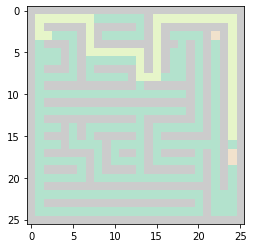

In [248]:
plt.imshow(maze1, cmap='Pastel2')

In [249]:
shortest_path_length = len(path)
print(f"Distance of the shortest path: {shortest_path_length}")

Distance of the shortest path: 55


# Euclidean distance

In [250]:
def Euclidean_distance(node1, node2):
    '''
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Euclidean distance between the 2 nodes
    '''
    return ((node1[0] - node2[0])**2 + (node1[1] - node2[1])**2)**0.5
    pass



# A* Search

### Weight = 1

In [251]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    W=1
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + 1
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + W*Euclidean_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [252]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

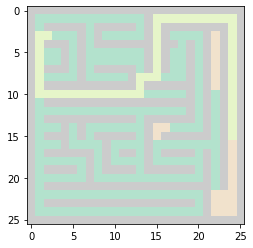

In [253]:
plt.imshow(maze1, cmap='Pastel2')

In [254]:
shortest_path_length = len(path)
print(f"Distance of the shortest path: {shortest_path_length}")

Distance of the shortest path: 55


# Manhattan distance

In [255]:
# implement the Manhattan distance between the 2 nodes, and update the code for A* accordingly
def Manhattan_distance(node1, node2):
    '''
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Manhattan distance between the 2 nodes
    '''
    x1, y1 = node1
    x2, y2 = node2
    return abs(x1 - x2) + abs(y1 - y2)
#     refer to https://xlinux.nist.gov/dads/HTML/manhattanDistance.html
    pass

# A* Search 

### Weight = 1

In [256]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    W=1
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + 1
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + W*Manhattan_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [257]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

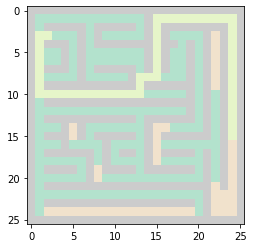

In [258]:
plt.imshow(maze1, cmap='Pastel2')

In [259]:
shortest_path_length = len(path)
print(f"Distance of the shortest path: {shortest_path_length}")

Distance of the shortest path: 55


### START = (7,20), GOAL = (21,2)

In [260]:
START=(21,22)
GOAL=(1,3)

In [261]:
def Find_the_edges(maze):
    '''
    para1: numpy array of the maze structure
    return graph of the connected nodes
    '''
    graph={}
    grid_size=len(maze)
    for i in range(grid_size):
        for j in range(grid_size):
            if(maze[i][j]!=1):
                adj=[]
                eles=[]
                if i - 1 >= 0:
                    eles.append((i-1,j))
                if i + 1 < grid_size:
                    eles.append((i+1,j))
                if j - 1 >=0:
                    eles.append((i,j-1))
                if j+1< grid_size:
                    eles.append((i,j+1))
                for ele in eles:
                    if maze[ele[0]][ele[1]] == 0 or maze[ele[0]][ele[1]]=='3' :
                        adj.append((ele[0],ele[1]))
                graph[(i,j)]=adj
    return graph

# Breadth First Search (BFS)

In [262]:
from collections import deque
def BreadthFirst(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    queue = deque([([start], start)])
    visited = set()
    
    while queue:
        path, current = queue.popleft()
        #print(path, current)
        if current == goal:
            #print( path)
            return visited, np.array(path)
        if current in visited:
            continue
        #print(current)
        visited.add(current)
        for neighbour in graph[current]:
            #print(graph[current])
            p = list(path)
            p.append(neighbour)
            queue.append((p, neighbour))
    return visited, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [263]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = BreadthFirst(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

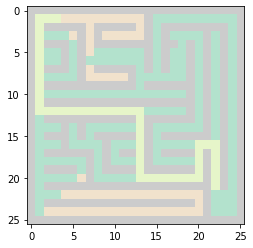

In [264]:
plt.imshow(maze1, cmap='Pastel2')

In [265]:
shortest_path_length = len(path)
print(f"Distance of the shortest path: {shortest_path_length}")

Distance of the shortest path: 52


# Dijkstra Algorithm

In [266]:

def dijkstra_algorithm(graph, start_node, GOAL):
    '''
    para1: connected graph 
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    unvisited_nodes = list(graph.keys())
 
    # We'll use this dict to save the cost of visiting each node and update it as we move along the graph   
    shortest_path = {}
 
    # We'll use this dict to save the shortest known path to a node found so far
    previous_nodes = {}
 
    # We'll use max_value to initialize the "infinity" value of the unvisited nodes   
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value
    # However, we initialize the starting node's value with 0   
    shortest_path[start_node] = 0
    
    # The algorithm executes until we visit all nodes
    while GOAL in unvisited_nodes:
        # The code block below finds the node with the lowest score
        current_min_node = None
        for node in unvisited_nodes: # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
                
        # The code block below retrieves the current node's neighbors and updates their distances
        neighbors = graph[current_min_node]
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + 1 
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node
 
        # After visiting its neighbors, we mark the node as "visited"
        unvisited_nodes.remove(current_min_node)

    current= GOAL
    path = []
    while current != START: 
        path.append(current)
        #print(previous_nodes[current])
        current = previous_nodes[current]
    path.append(START) 
    path.reverse() 
    return previous_nodes, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    


'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [267]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = dijkstra_algorithm(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

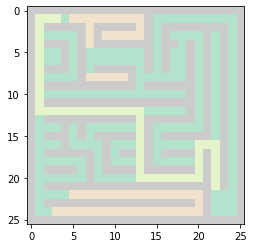

In [268]:
plt.imshow(maze1, cmap='Pastel2')

In [269]:
shortest_path_length = len(path)
print(f"Distance of the shortest path: {shortest_path_length}")

Distance of the shortest path: 52


# Euclidean distance

In [270]:
def Euclidean_distance(node1, node2):
    '''
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Euclidean distance between the 2 nodes
    '''
    return ((node1[0] - node2[0])**2 + (node1[1] - node2[1])**2)**0.5
    pass



# A* Search

### Weight = 1

In [271]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    W=1
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + 1
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + W*Euclidean_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [272]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

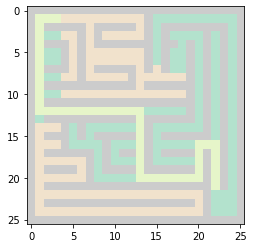

In [273]:
plt.imshow(maze1, cmap='Pastel2')

In [274]:
shortest_path_length = len(path)
print(f"Distance of the shortest path: {shortest_path_length}")

Distance of the shortest path: 52


# Manhattan distance

In [275]:
# implement the Manhattan distance between the 2 nodes, and update the code for A* accordingly
def Manhattan_distance(node1, node2):
    '''
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Manhattan distance between the 2 nodes
    '''
    x1, y1 = node1
    x2, y2 = node2
    return abs(x1 - x2) + abs(y1 - y2)
#     refer to https://xlinux.nist.gov/dads/HTML/manhattanDistance.html
    pass

# A* Search 

### Weight = 1

In [276]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    W=1
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + 1
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + W*Manhattan_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [277]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

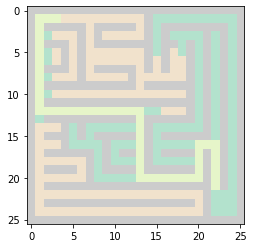

In [278]:
plt.imshow(maze1, cmap='Pastel2')

In [279]:
shortest_path_length = len(path)
print(f"Distance of the shortest path: {shortest_path_length}")

Distance of the shortest path: 52


### Observations:

Based on the different start and goal states the path varies in certain cases the path that it takes for BFS, Dijisktra and A* are not the same, Due to increased optimality the A* algorithm doesn't visit all the nodes. Especially in the random start and goal scenario as it doesn't have to travel the entire search space.

### Task - 8

The initally assumation which we made in the Find_the_edges() is the robot can only move in UP, DOWN, LEFT and RIGHT. Now it can move diagonally as well. Modifiy the function and repeat the tasks 1-6 (and visualize the solution for each). Use W=1 in this task (non need in **"Chose a broad set of values for W to see the difference"**). Explain your observations

In [280]:
START=(1, 1)
GOAL=(24,24)

In [281]:
def Find_the_edges(maze):
    '''
    para1: numpy array of the maze structure
    return graph of the connected nodes
    '''
    graph={}
    grid_size=len(maze)
    for i in range(grid_size):
        for j in range(grid_size):
            if(maze[i][j]!=1):
                adj=[]
                eles=[]
                if i - 1 >= 0:
                    eles.append((i-1,j))
                    if j - 1 >=0:
                        eles.append((i-1,j-1))
                    if j+1< grid_size:
                        eles.append((i-1,j+1))
                if i + 1 < grid_size:
                    eles.append((i+1,j))
                    if j - 1 >=0:
                        eles.append((i+1,j-1))
                    if j+1< grid_size:
                        eles.append((i+1,j+1))
                if j - 1 >=0:
                    eles.append((i,j-1))
                if j+1< grid_size:
                    eles.append((i,j+1))
                for ele in eles:
                    if maze[ele[0]][ele[1]] == 0 or maze[ele[0]][ele[1]]=='3' :
                        adj.append((ele[0],ele[1]))
                graph[(i,j)]=adj
    return graph

# Breadth First Search (BFS)

In [282]:
from collections import deque
def BreadthFirst(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    queue = deque([([start], start)])
    visited = set()
    
    while queue:
        path, current = queue.popleft()
        #print(path, current)
        if current == goal:
            #print( path)
            return visited, np.array(path)
        if current in visited:
            continue
        #print(current)
        visited.add(current)
        for neighbour in graph[current]:
            #print(graph[current])
            p = list(path)
            p.append(neighbour)
            queue.append((p, neighbour))
    return visited, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [283]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = BreadthFirst(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

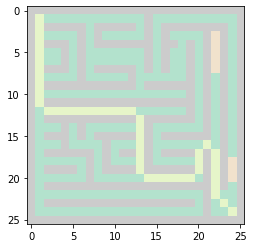

In [284]:
plt.imshow(maze1, cmap='Pastel2')

In [285]:
shortest_path_length = len(path)
print(f"Distance of the shortest path: {shortest_path_length}")

Distance of the shortest path: 47


# Dijkstra Algorithm

In [286]:

def dijkstra_algorithm(graph, start_node, GOAL):
    '''
    para1: connected graph 
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    unvisited_nodes = list(graph.keys())
 
    # We'll use this dict to save the cost of visiting each node and update it as we move along the graph   
    shortest_path = {}
 
    # We'll use this dict to save the shortest known path to a node found so far
    previous_nodes = {}
 
    # We'll use max_value to initialize the "infinity" value of the unvisited nodes   
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value
    # However, we initialize the starting node's value with 0   
    shortest_path[start_node] = 0
    
    # The algorithm executes until we visit all nodes
    while GOAL in unvisited_nodes:
        # The code block below finds the node with the lowest score
        current_min_node = None
        for node in unvisited_nodes: # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
                
        # The code block below retrieves the current node's neighbors and updates their distances
        neighbors = graph[current_min_node]
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + 1 
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node
 
        # After visiting its neighbors, we mark the node as "visited"
        unvisited_nodes.remove(current_min_node)

    current= GOAL
    path = []
    while current != START: 
        path.append(current)
        #print(previous_nodes[current])
        current = previous_nodes[current]
    path.append(START) 
    path.reverse() 
    return previous_nodes, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    


'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [287]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = dijkstra_algorithm(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

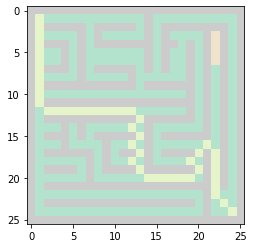

In [288]:
plt.imshow(maze1, cmap='Pastel2')

In [289]:
shortest_path_length = len(path)
print(f"Distance of the shortest path: {shortest_path_length}")

Distance of the shortest path: 47


# Euclidean distance

In [290]:
def Euclidean_distance(node1, node2):
    '''
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Euclidean distance between the 2 nodes
    '''
    return ((node1[0] - node2[0])**2 + (node1[1] - node2[1])**2)**0.5
    pass



# A* Search

### Weight = 1

In [291]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    W=1
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + 1
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + W*Euclidean_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [292]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

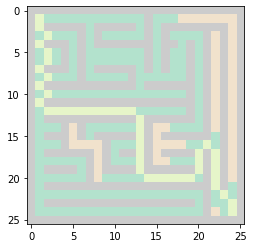

In [293]:
plt.imshow(maze1, cmap='Pastel2')

In [294]:
shortest_path_length = len(path)
print(f"Distance of the shortest path: {shortest_path_length}")

Distance of the shortest path: 47


# Manhattan distance

In [295]:
# implement the Manhattan distance between the 2 nodes, and update the code for A* accordingly
def Manhattan_distance(node1, node2):
    '''
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Manhattan distance between the 2 nodes
    '''
    x1, y1 = node1
    x2, y2 = node2
    return abs(x1 - x2) + abs(y1 - y2)
#     refer to https://xlinux.nist.gov/dads/HTML/manhattanDistance.html
    pass

# A* Search 

### Weight = 1

In [296]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    W=1
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + 1
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + W*Manhattan_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [297]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = astar_path(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

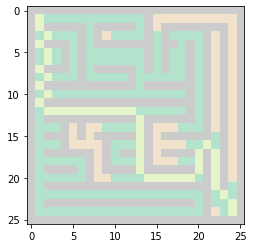

In [298]:
plt.imshow(maze1, cmap='Pastel2')

In [299]:
shortest_path_length = len(path)
print(f"Distance of the shortest path: {shortest_path_length}")
print(len(visited))

Distance of the shortest path: 47
258


### Observations:

On letting the agent travel diagonally we find that it reduces the shortest path, but it increases the search space. 

### Bonus Task (10 pt): Solving "Sliding Tile Puzzle" with A*-Search
the initial and the final configurations are given at the image below. 
you can use **the number of displaced tiles** as a heuristics function, $h_1$. Use W=1
add you code and print the optimal action sequence (which tile to move) from the intial to the final configuration.
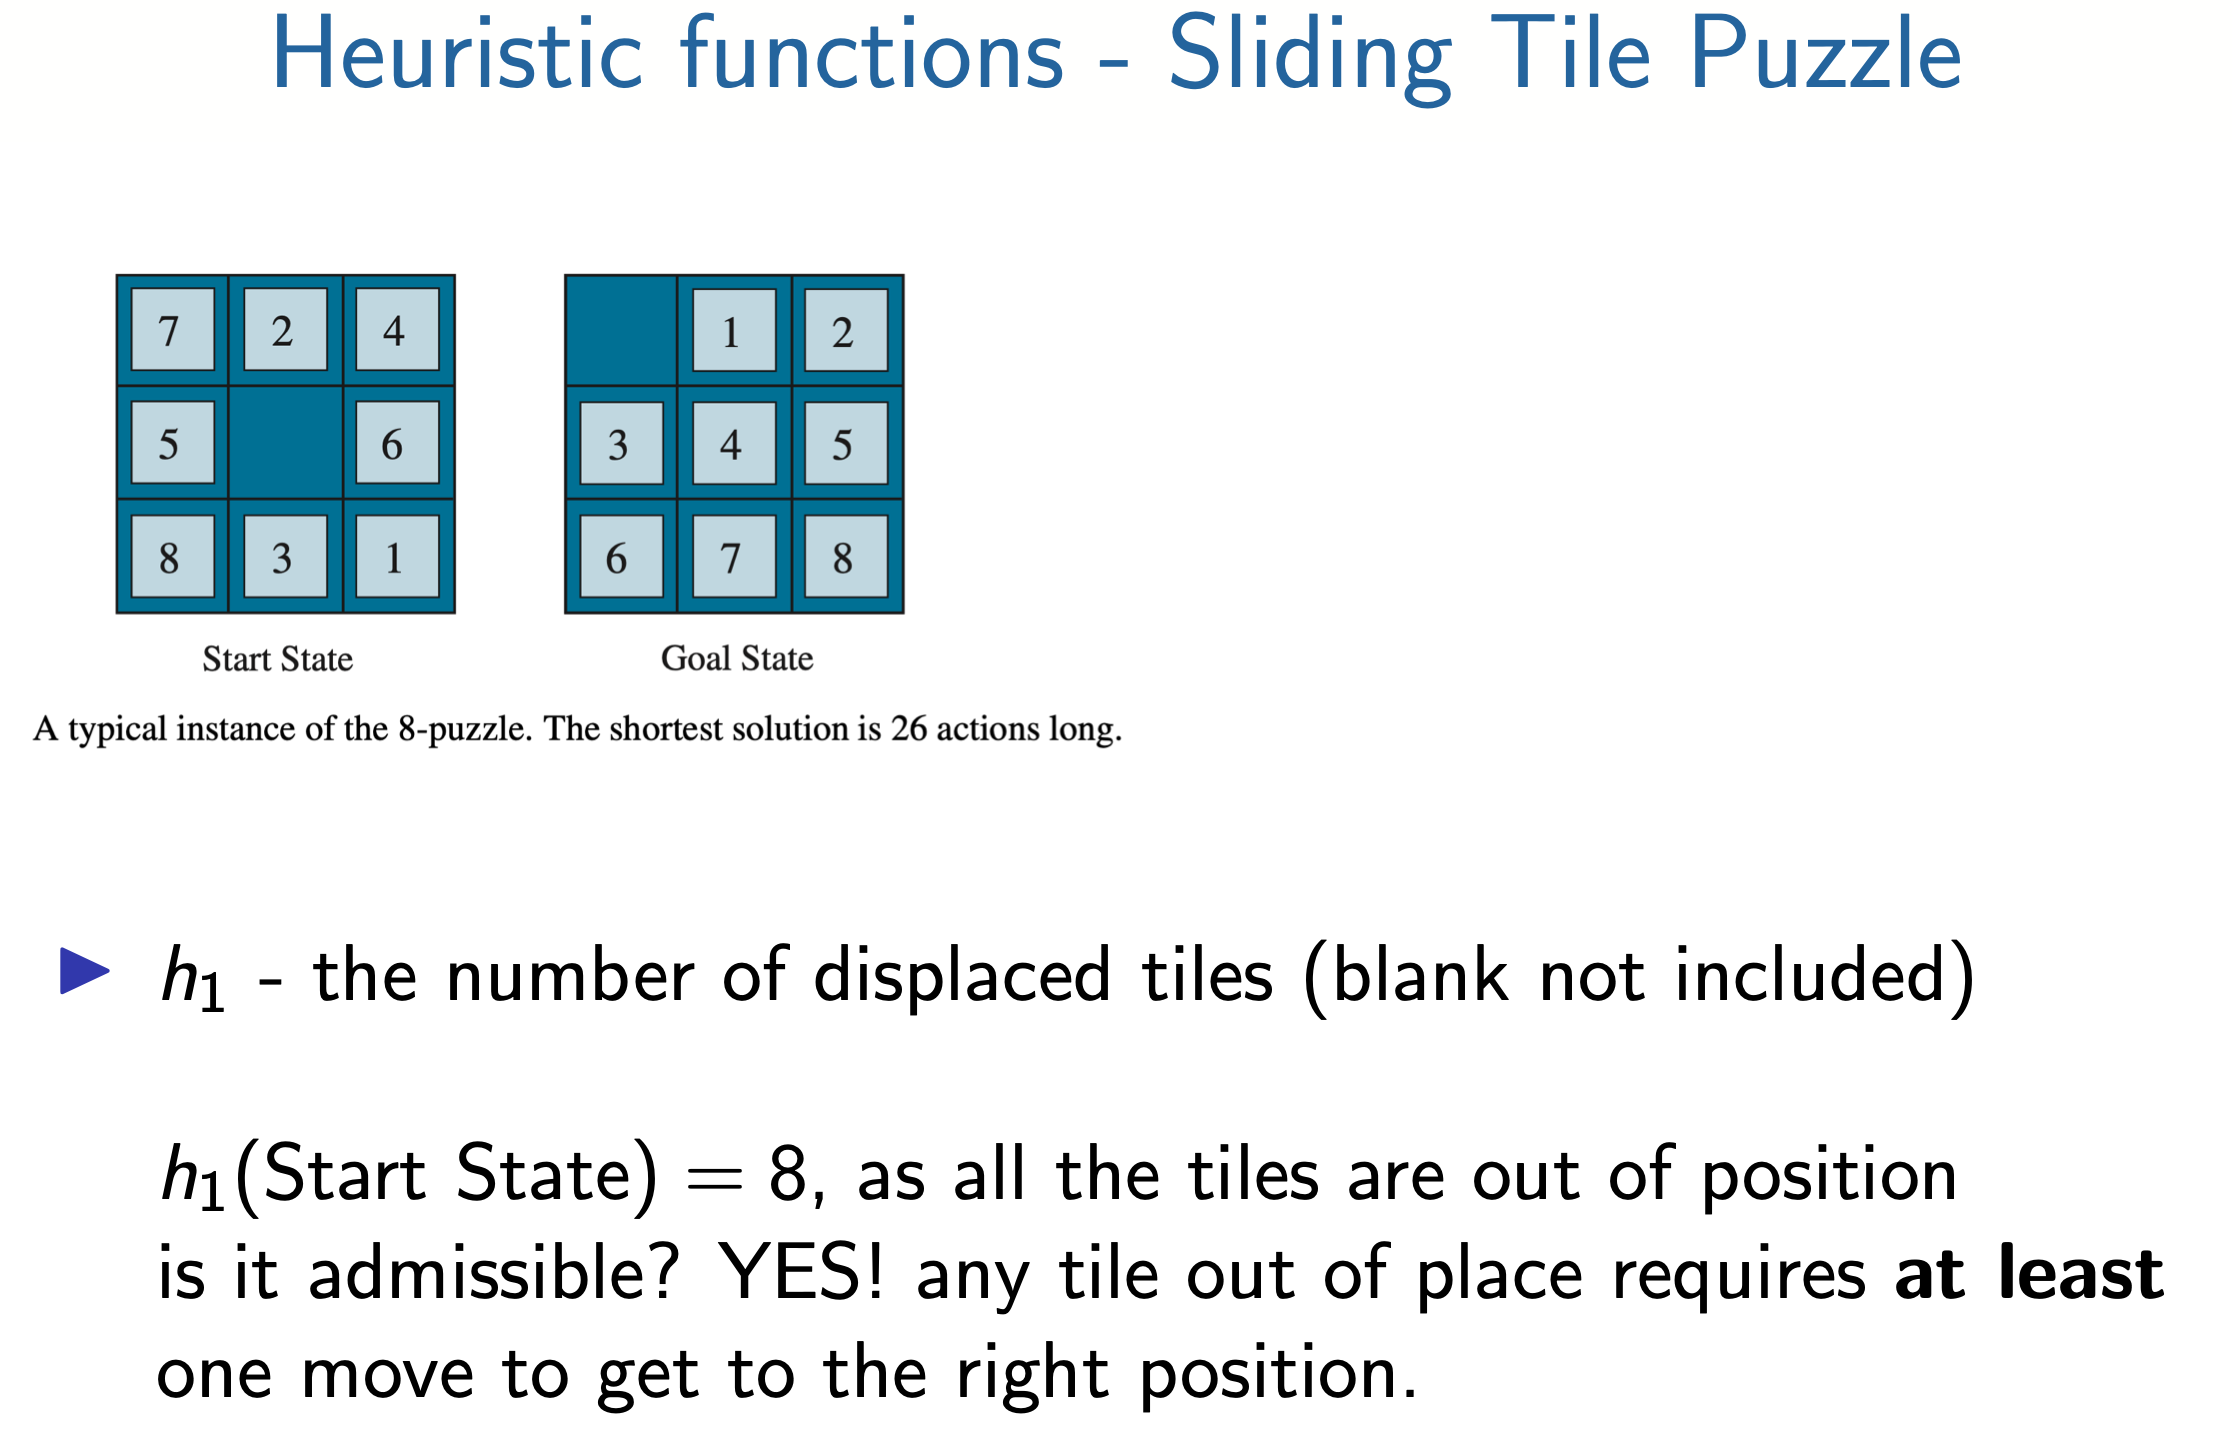

In [300]:
import heapq
import copy

class Slide_Puzzle:
    def __init__(self, state, g=0, h=0):
        self.state = state  # Current state of the puzzle
        self.g = g  # Cost from the initial state to this state
        self.h = h  # Heuristic value (number of misplaced tiles)
        self.parent = None  # Parent state
    
    def __lt__(self, other):
        # Compare states based on f = g + h
        return (self.g + self.h) < (other.g + other.h)

# Define initial and goal states
initial_state = [[7, 2, 4], [5, 0, 6], [8, 3, 1]]  # Initial state
goal_state = [[0, 1, 2], [3, 4, 5], [6, 7, 8]]  # Goal state

def h1(state, goal):
    count = 0
    for i in range(3):
        for j in range(3):
            if state[i][j] != goal[i][j]:
                count += 1
    return count
  
def astar_puzzle(initial_state, goal_state):
    # Initialize priority queue
    frontier = []
    heapq.heappush(frontier, Slide_Puzzle(initial_state, 0, h1(initial_state, goal_state)))
    
    
    visited = set()
    
    # Perform A* search
    while frontier:
        current_state = heapq.heappop(frontier)
        current_puzzle = current_state.state
        
        if current_puzzle == goal_state:
            # Reached the goal state, backtrack to find the solution
            solution_sequence = []
            while current_state:
                solution_sequence.append(current_state)
                current_state = current_state.parent
            solution_sequence.reverse()  # Reverse to get the correct order
            return solution_sequence
        
        visited.add(tuple(map(tuple, current_puzzle))) 
        
        # Generate successor states
        zero_row, zero_col = None, None
        for i in range(3):
            for j in range(3):
                if current_puzzle[i][j] == 0:
                    zero_row, zero_col = i, j
        
        moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # Right, Left, Down, Up
        
        for a, b in moves:
            new_row, new_col = zero_row + a, zero_col + b
            if 0 <= new_row < 3 and 0 <= new_col < 3:
                new_state = copy.deepcopy(current_puzzle)
                new_state[zero_row][zero_col], new_state[new_row][new_col] = new_state[new_row][new_col], new_state[zero_row][zero_col]
                
                if tuple(map(tuple, new_state)) not in visited:
                    # Compute g and h values for the new state
                    g_value = current_state.g + 1
                    h_value = h1(new_state, goal_state)
                    
                    # Add the new state to the frontier
                    updated_puzzlestate = Slide_Puzzle(new_state, g_value, h_value)
                    updated_puzzlestate.parent = current_state  # Set the parent state
                    heapq.heappush(frontier, updated_puzzlestate)
    
    return None  # No solution found

def print_puzzle(state):
    for row in state:
        print(" ".join(map(str, row)))
    print("\n")

# Call the A* search function
print("Initial Puzzle:")
print_puzzle(initial_state)
solution_sequence = astar_puzzle(initial_state, goal_state)

if solution_sequence is not None:
    print("Goal Puzzle:")
    print_puzzle(goal_state)
    print("Shortest Solution:")
    for i, state in enumerate(solution_sequence):
        print(f"Step {i + 1}:")
        print_puzzle(state.state)
else:
    print("Invalid initial state")


Initial Puzzle:
7 2 4
5 0 6
8 3 1


Goal Puzzle:
0 1 2
3 4 5
6 7 8


Shortest Solution:
Step 1:
7 2 4
5 0 6
8 3 1


Step 2:
7 2 4
0 5 6
8 3 1


Step 3:
0 2 4
7 5 6
8 3 1


Step 4:
2 0 4
7 5 6
8 3 1


Step 5:
2 5 4
7 0 6
8 3 1


Step 6:
2 5 4
7 6 0
8 3 1


Step 7:
2 5 4
7 6 1
8 3 0


Step 8:
2 5 4
7 6 1
8 0 3


Step 9:
2 5 4
7 6 1
0 8 3


Step 10:
2 5 4
0 6 1
7 8 3


Step 11:
2 5 4
6 0 1
7 8 3


Step 12:
2 5 4
6 1 0
7 8 3


Step 13:
2 5 4
6 1 3
7 8 0


Step 14:
2 5 4
6 1 3
7 0 8


Step 15:
2 5 4
6 1 3
0 7 8


Step 16:
2 5 4
0 1 3
6 7 8


Step 17:
2 5 4
1 0 3
6 7 8


Step 18:
2 5 4
1 3 0
6 7 8


Step 19:
2 5 0
1 3 4
6 7 8


Step 20:
2 0 5
1 3 4
6 7 8


Step 21:
0 2 5
1 3 4
6 7 8


Step 22:
1 2 5
0 3 4
6 7 8


Step 23:
1 2 5
3 0 4
6 7 8


Step 24:
1 2 5
3 4 0
6 7 8


Step 25:
1 2 0
3 4 5
6 7 8


Step 26:
1 0 2
3 4 5
6 7 8


Step 27:
0 1 2
3 4 5
6 7 8


